In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




Git config

In [ ]:
%cd cover-type-classifcation

/content/cover-type-classifcation


In [ ]:
#load the data set
df = pd.read_csv("covertype.csv")

Dataset exploration

In [ ]:
#check missing values
print(df.isnull().sum().sum())
#info
print(df.shape)
print(df.info())

0
(581012, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   X_Coord                             581012 non-null  int64
 1   Y_Coord                             581012 non-null  int64
 2   Region_ID                           581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade_3pm                       5

In [ ]:
df = df.rename(columns={
    'Unnamed: 0': 'X_Coord',
    'Unnamed: 1': 'Y_Coord',
    'Unnamed: 2': 'Region_ID'
})
df.head()

,X_Coord,Y_Coord,Region_ID,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
#dispersion
df.describe()

,X_Coord,Y_Coord,Region_ID,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
print(df['Cover_Type'].values.min())
print(df['Cover_Type'].values.max())
print("the most frequent class is :",df['Cover_Type'].mode())
# ranges from 1 to 7 , 7 classes bimodal distribution

1
7
the most frequent class is : 0    2
Name: Cover_Type, dtype: int64


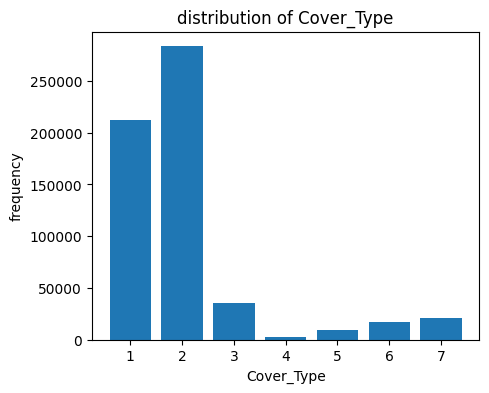

In [ ]:
counts = df['Cover_Type'].value_counts().sort_index()  # counts per class 1-7
plt.figure(figsize=(5,4))
plt.bar(counts.index, counts.values)
plt.xlabel('Cover_Type')
plt.ylabel('frequency')
plt.title('distribution of Cover_Type')
plt.show()

In [ ]:
# confirm unbalance
counts = df['Cover_Type'].value_counts()
print((counts / counts.sum()) * 100)  # percentage per class

Cover_Type
2    48.759922
1    36.460521
3     6.153746
7     3.530048
6     2.989095
5     1.633873
4     0.472796
Name: count, dtype: float64


We notice really high class imbalance in the dataset specifically between class 4 and 2:
- choose evaluation metrics other than accuracy
- look into tree based algos


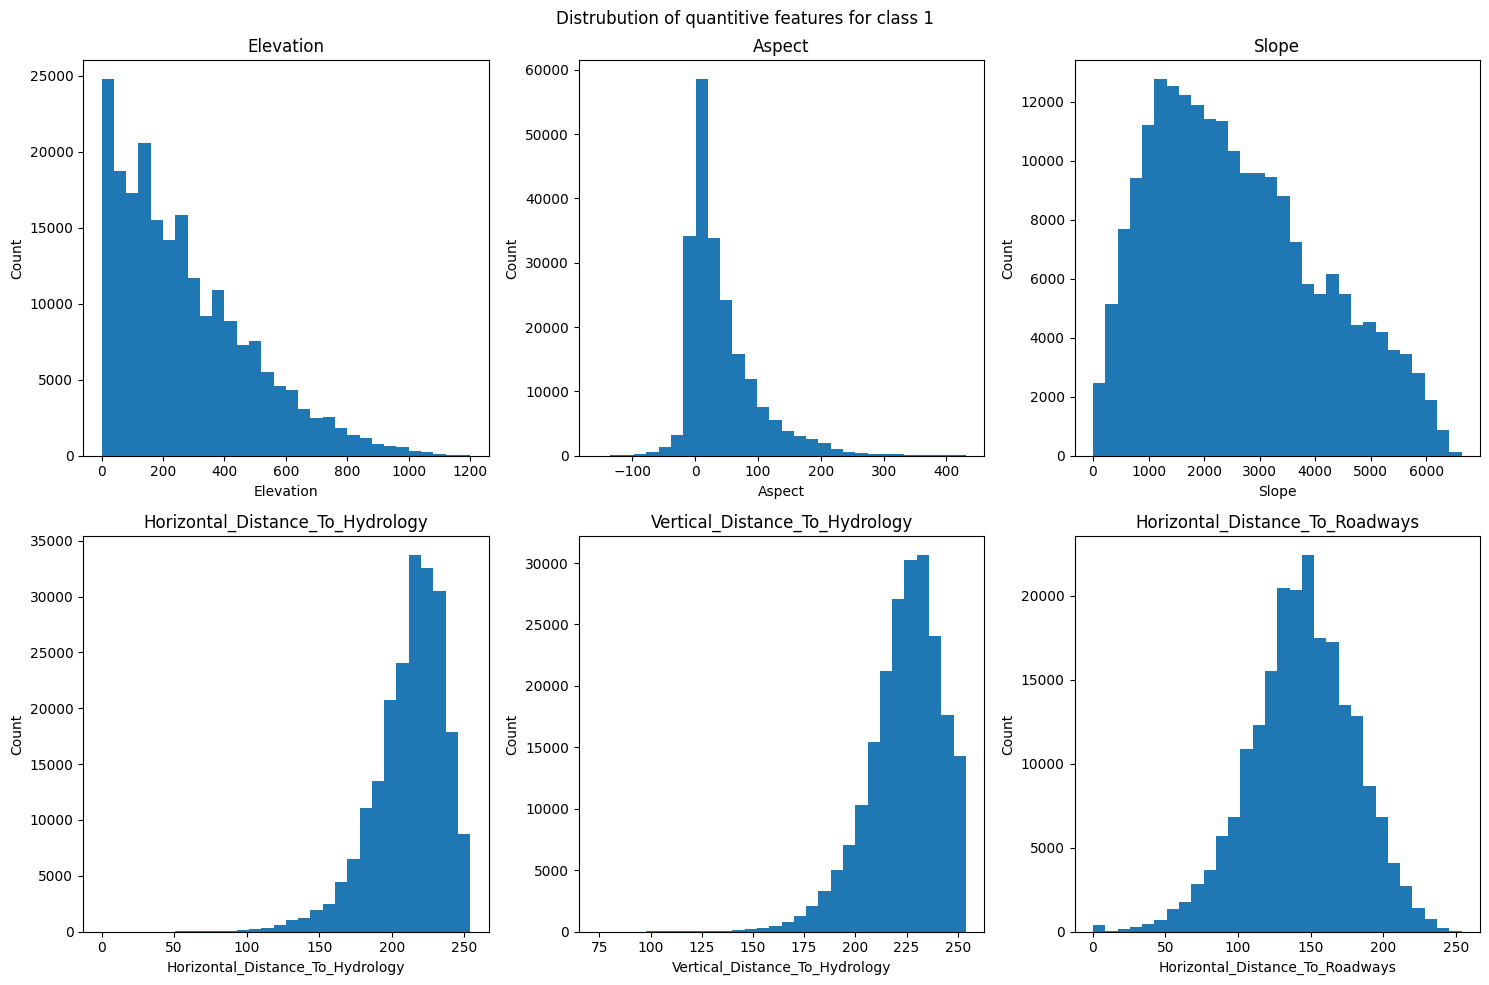

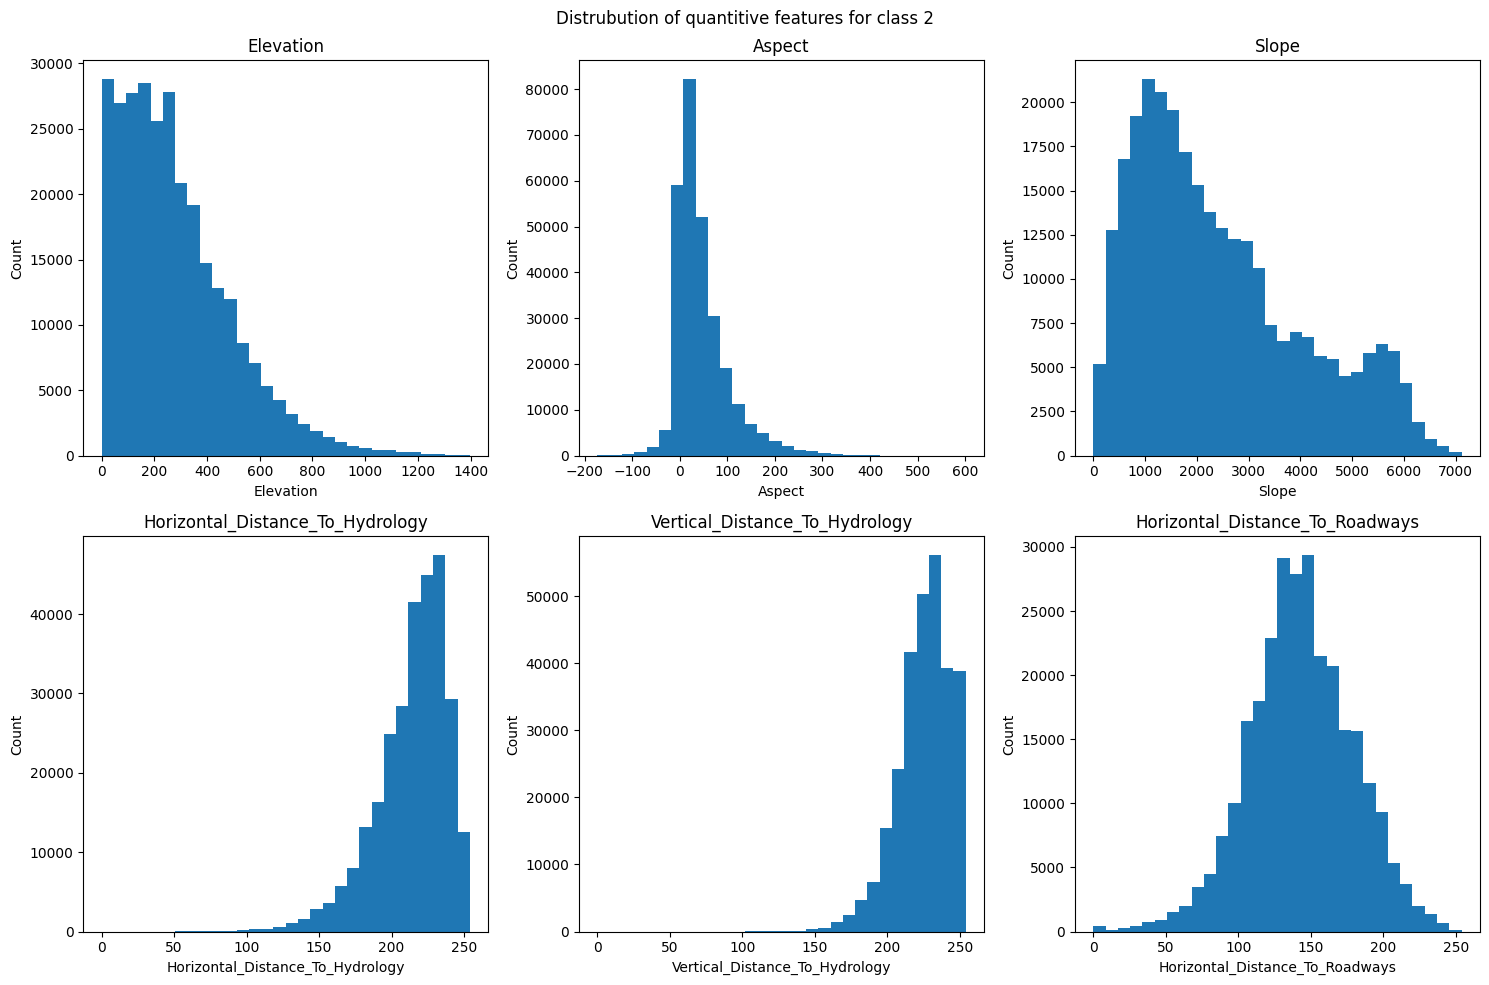

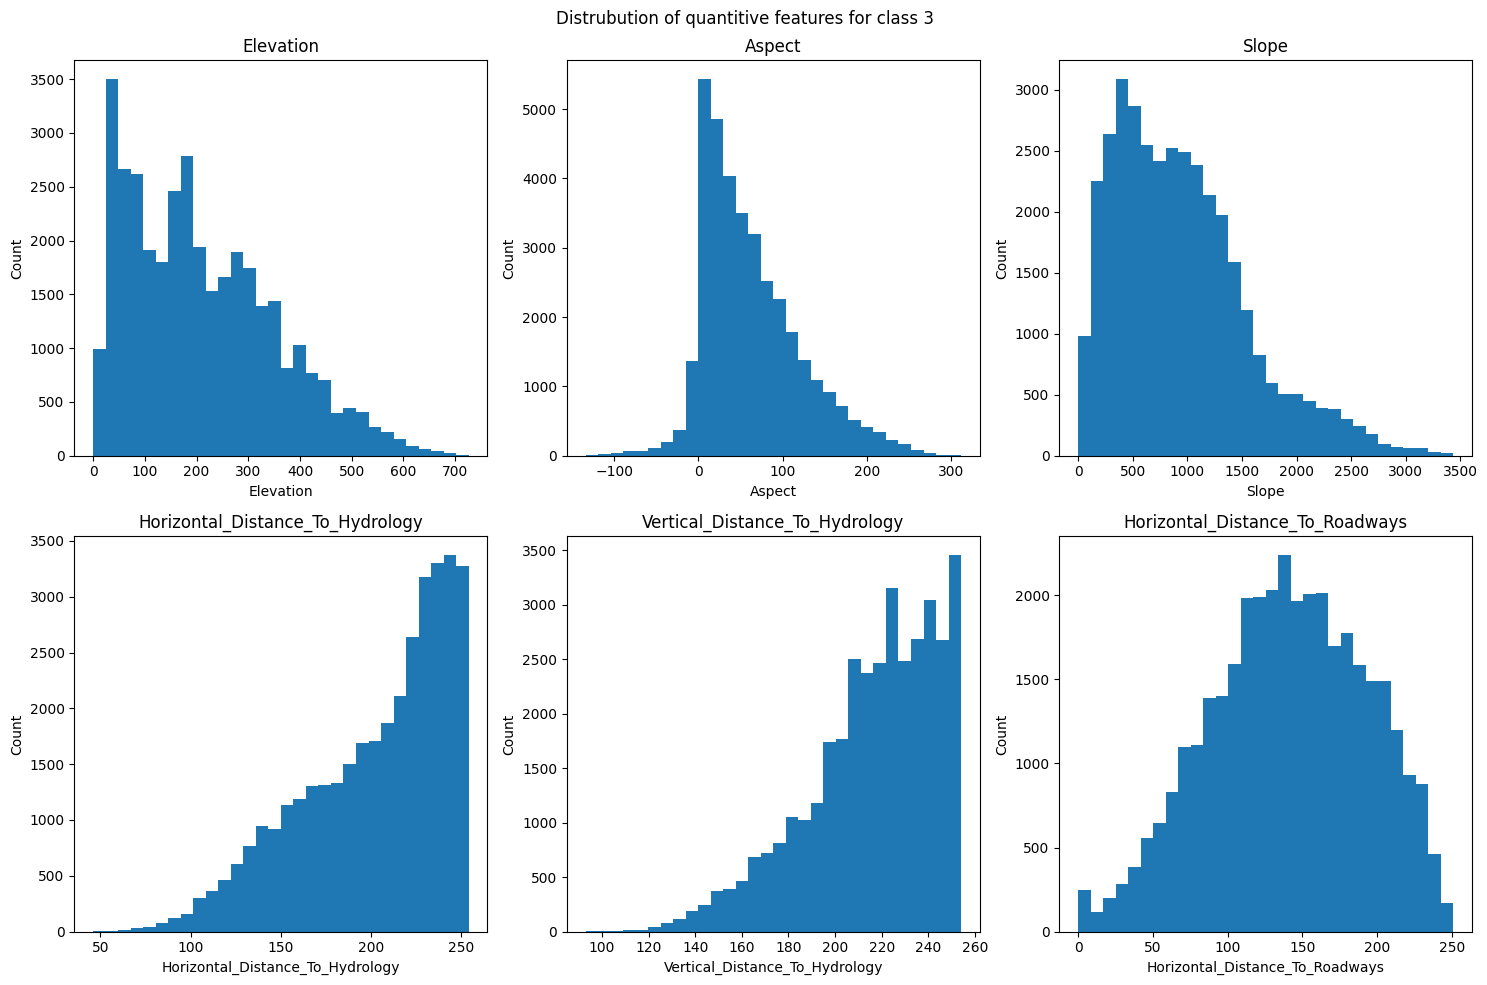

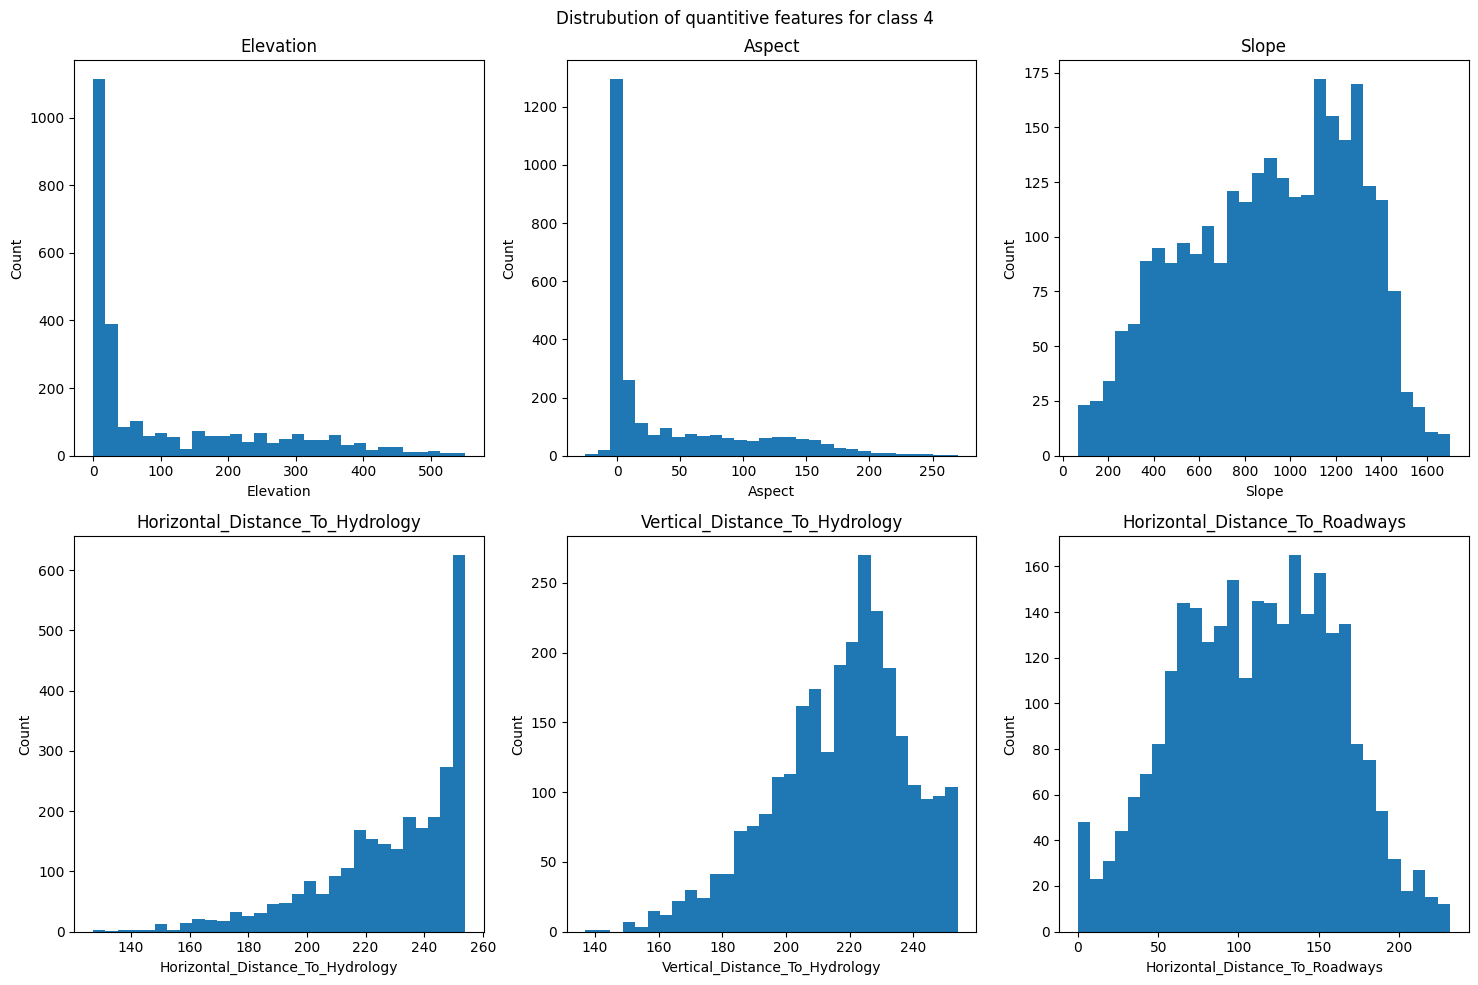

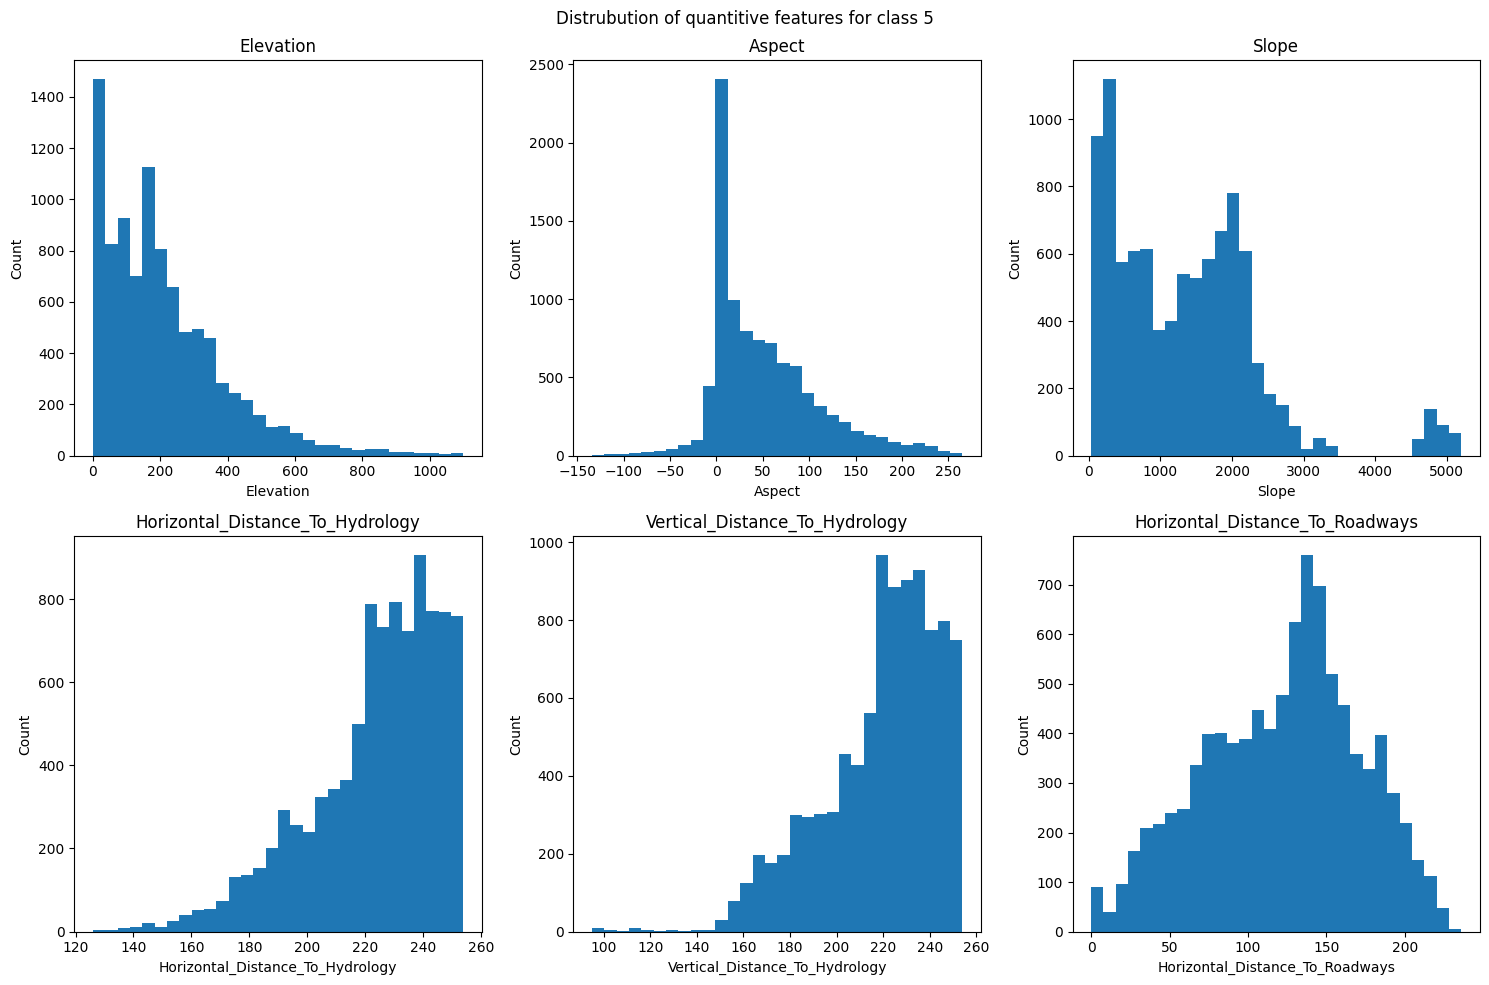

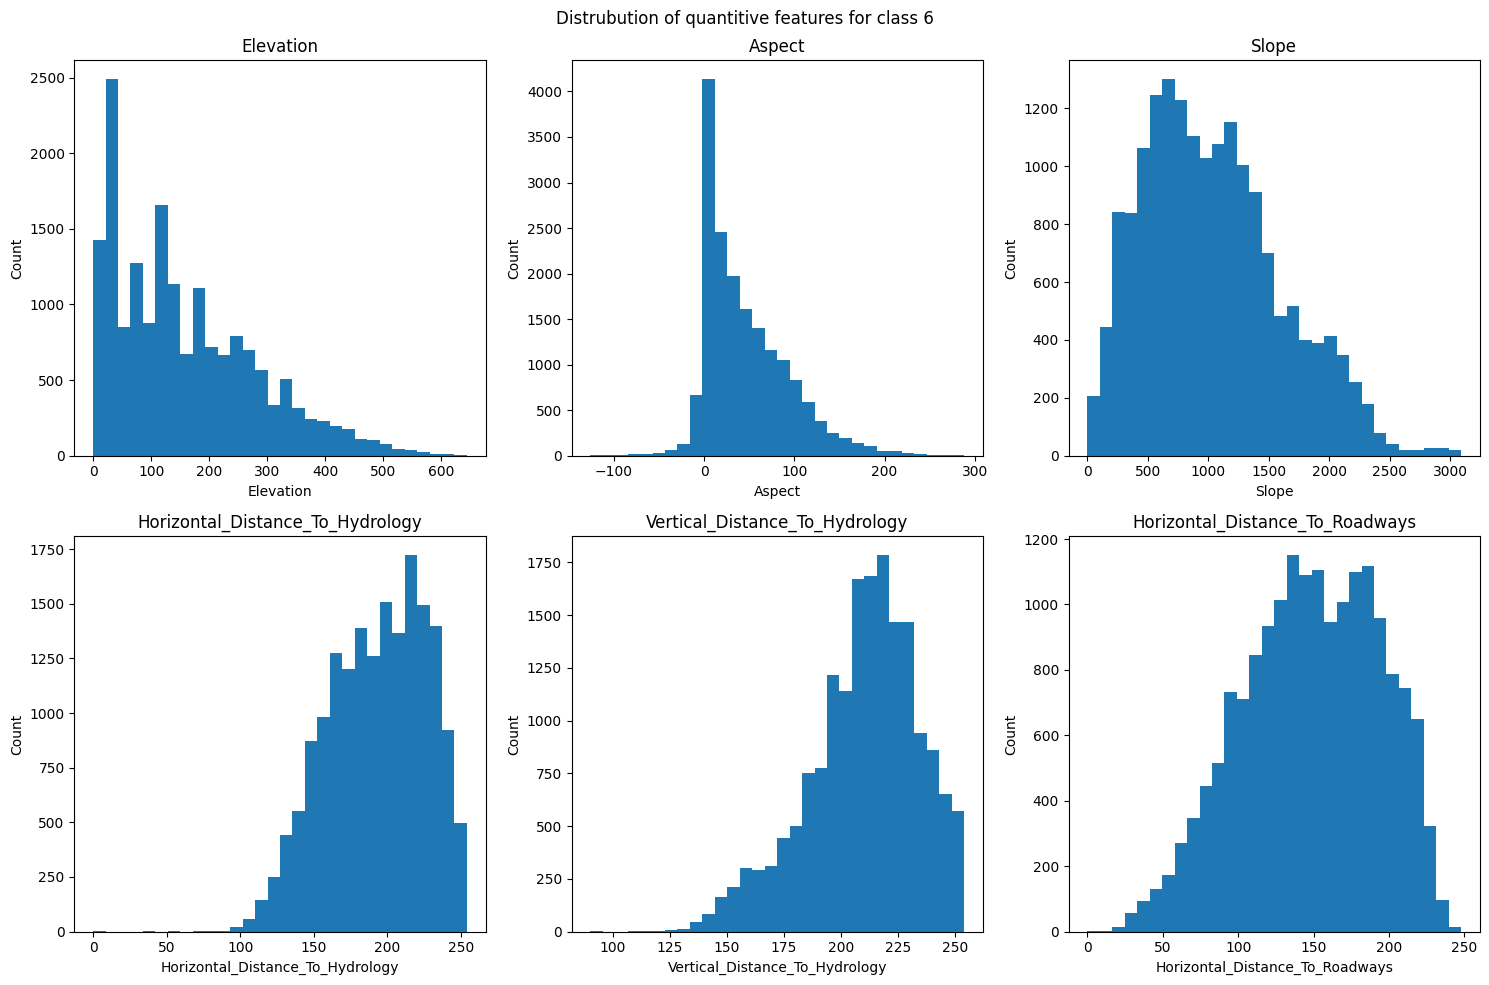

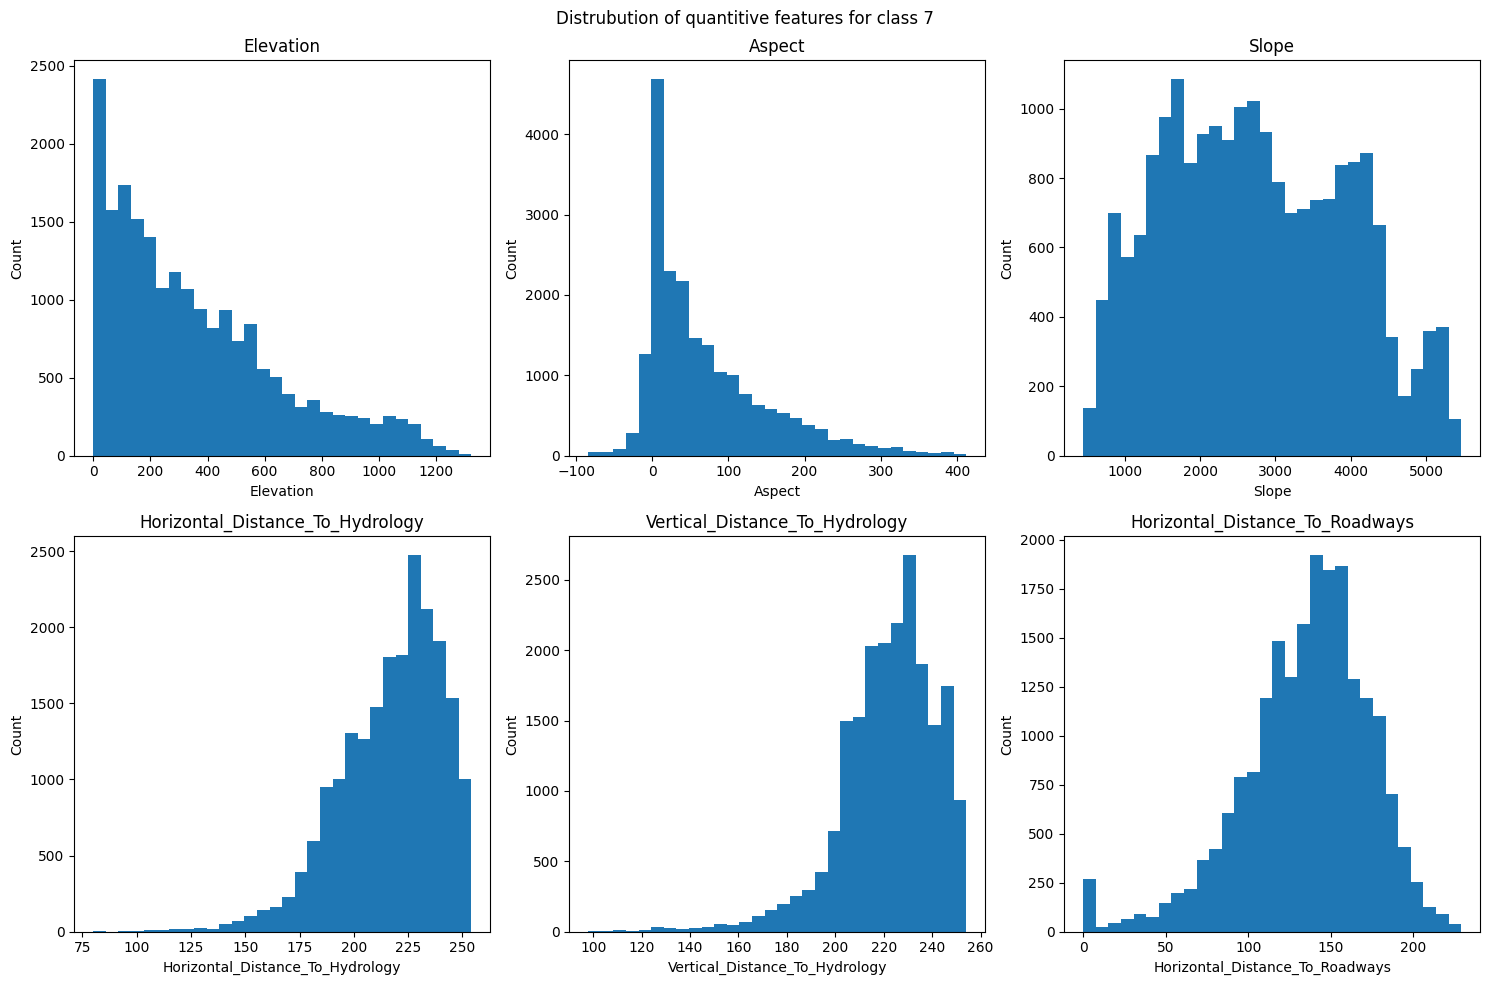

In [ ]:
#quantitive features distribution
features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
            'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']
for k in range(7):
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
  axes = axes.flatten()
  for i, feature in enumerate(features):
      axes[i].hist(df[df['Cover_Type']== k+1][feature], bins=30)
      axes[i].set_title(feature)
      axes[i].set_xlabel(feature)
      axes[i].set_ylabel('Count')

  plt.suptitle(f"Distrubution of quantitive features for class {k+1}")
  plt.tight_layout()  # adjusts spacing so titles/labels don't overlap
  plt.show()


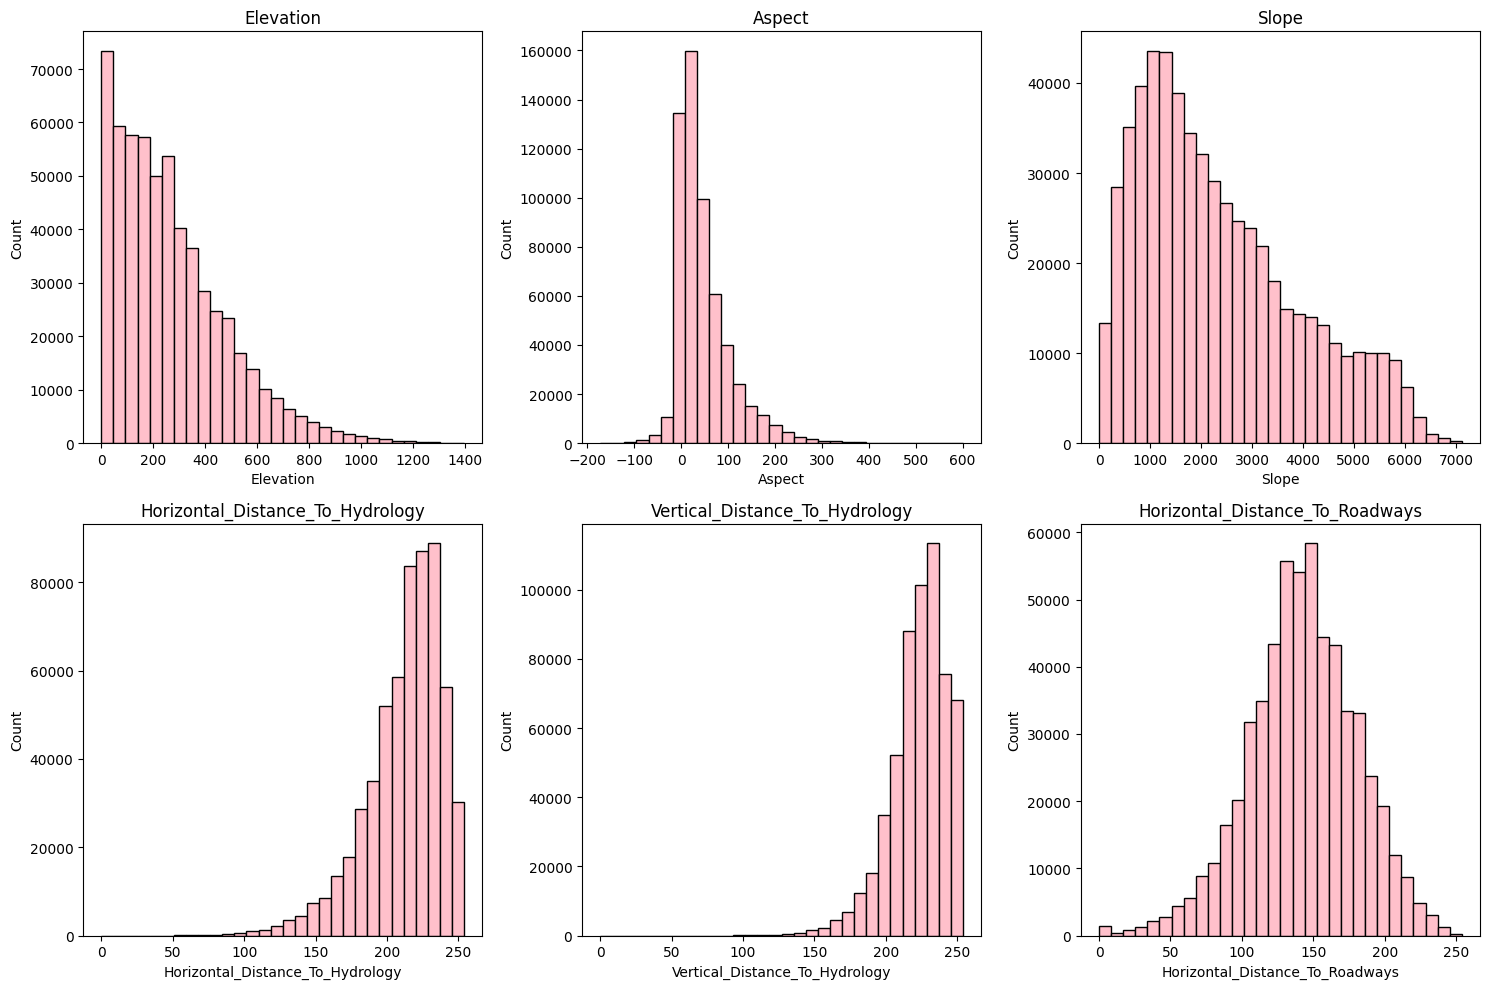

In [ ]:
# global distribution of numeric features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']
for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=30, color='pink', edgecolor='black')
    axes[i].set_title(feature)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()  # adjusts spacing so titles/labels don't overlap
plt.show()


**initial remarks**
- Elevation is always low for class 4 and more dispersed in class 2 and 1
- horizontal and vertical distance to hydrolics are similar in shape and close in values ( correlation indicators )


In [102]:
!pwd
!ls -a

/content/cover-type-classifcation
.  ..  covertype.csv  ForestCover.ipynb  .git  .ipynb_checkpoints


In [99]:
!git add .
!git commit -m "Initial EDA"
!git push


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date


In [103]:
# Check if you're editing THIS notebook file or a different one
!find /content -name "ForestCover.ipynb" -exec ls -lh {} \;

# Also check what Colab thinks the current notebook path is
import os
try:
    from google.colab import _message
    print("Current notebook:", os.getcwd())
except:
    pass

-rw------- 1 root root 933K Dec  5 21:19 '/content/drive/MyDrive/Colab Notebooks/ForestCover.ipynb'
-rw------- 1 root root 36K Dec  5 19:43 /content/cover-type-classifcation/ForestCover.ipynb
Current notebook: /content/cover-type-classifcation
